Next, is the optimization section. This is arguably the most relevant to me right now as I need a tool that does excel solver well.

While SciPy is a powerful library for optimization, it may not be the most user-friendly option for those looking to closely mimic Excel Solver’s functionality. There are other Python libraries that can provide a more similar experience to Excel Solver:

PuLP: A linear programming library that is quite intuitive and can handle a variety of optimization problems. It’s a good choice for those familiar with Excel Solver.
CVXPY: A library for convex optimization that can handle more complex constraints and objectives.
py-excel-solver: A wrapper around SciPy’s linprog function designed to closely mimic Excel Solver’s UI and functionality. It allows you to copy and paste values from Excel and get similar outputs1

# Imports

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

# Least Square Curve Fitting

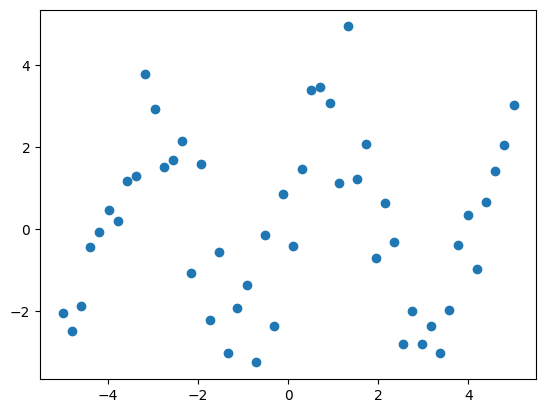

In [3]:
#creating data points
#50 evenlyout numbers from a line space from -5 to 5 
x_data = np.linspace(-5, 5, num=50)
#that number times a sin function with 50 random normal number adjustment
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

plt.scatter(x_data, y_data)

If we know that the data lies on a sine wave, but not the amplitudes or the period, we can find those by least squares curve fitting.

First we have to define the test function to fit, here a sine with unknown amplitude and period:

In [4]:
def test_func(x, a, b):
    return a * np.sin(b * x)
#defined the parameters that constitute this sin wave
#always use sin even if it is cos

In [5]:
from scipy import optimize

In [6]:
#we test to see a curve fit test_func, x_data, y_data, and an initial guess
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2, 2])
print(params)
print(params_covariance)

[2.58318411 1.53182618]
[[ 0.04074344 -0.00061001]
 [-0.00061001  0.00070689]]


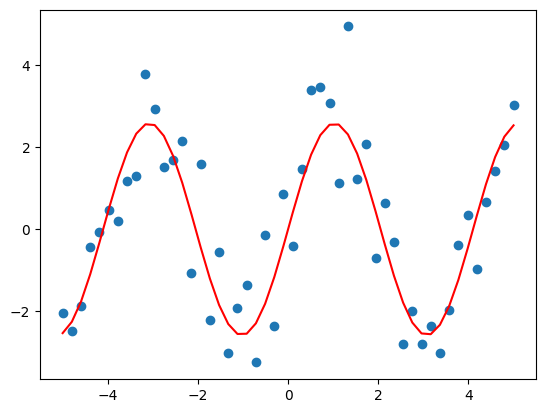

In [7]:
#Thats simple, just plot both in one field
#notice that the test_func(x_data, unpack param to a and b)
plt.scatter(x_data, y_data, label='Data points')
plt.plot(x_data, test_func(x_data, *params), label='Fitted curve', color='red')
plt.show()

the curve fit function produce the results, params and the covariance matrix of those results. param_covariance provides an estimate of the uncertainty (or variability) in the fitted parameters. The smaller the better. 

- Diagonal Elements: The diagonal elements represent the variance of each parameter estimate. For example, the variance of the first parameter (3.061) is 0.039, and the variance of the second parameter (1.473) is 0.0004. The square root of these values gives the standard deviation (or uncertainty) of the parameter estimates

- Off-Diagonal Elements: The off-diagonal elements represent the covariance between pairs of parameters. For example, the covariance between the first and second parameters is -0.0003. This value indicates how changes in one parameter might be correlated with changes in the other parameter. 

- In the efficient frontier, we want these covariance between pairs to be small

## How does curve fitting works in pandas df

The optimize.curve_fit function from SciPy requires the input data to be in the form of NumPy arrays. Therefore, you need to extract the values from the DataFrame before passing them to the function

If we know that there are 2 colums in pandas that could be curve fit, transform it to a numpy object using [].values()

In [8]:
df = pd.DataFrame({'x': x_data, 'y': y_data})

x = df['x'].values
y = df['y'].values

optimize.curve_fit(test_func, x, y, p0=[2, 2])


(array([2.58318411, 1.53182618]),
 array([[ 0.04074344, -0.00061001],
        [-0.00061001,  0.00070689]]))

## Curve fiting of tempurature data

In [9]:
y_data_max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
y_data_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.arange(12)

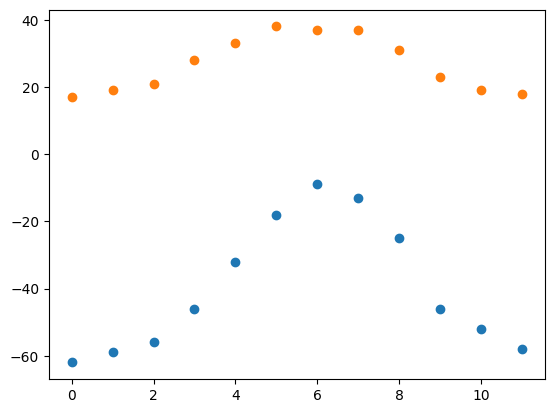

In [10]:
plt.scatter(months, y_data_min)
plt.scatter(months, y_data_max)
plt.show()

This is a cos wave of some sort, because it starts and then goes up.

In [11]:
#my best guess on what the curve might be
def func(x, a, b):
    return a * x**2 + b * x 

In [13]:
params, params_cov =optimize.curve_fit(func, months, y_data_min, p0=[2,2])

In [14]:
params

array([ 0.35386724, -7.87637488])

In [15]:
func(np.array(months), *params)

array([  0.        ,  -7.52250764, -14.33728081, -20.4443195 ,
       -25.84362371, -30.53519345, -34.51902871, -37.79512949,
       -40.3634958 , -42.22412763, -43.37702499, -43.82218786])

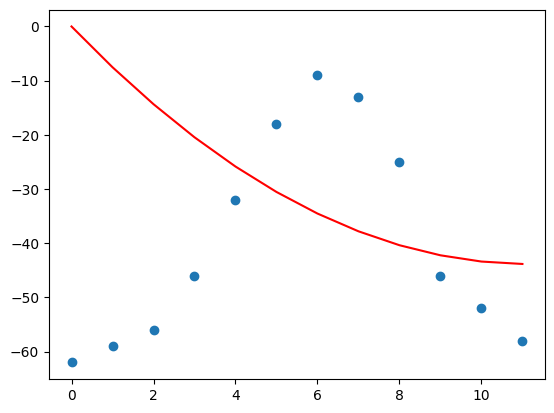

In [16]:
plt.scatter(months, y_data_min)
plt.plot(months, func(np.array(months), *params), color ='red')
plt.show()

# Mimimum of a Scalar function

What  is a scalar function?
Scalar functions takes one or more inputs and produces a single output. 
Example: ( f(x) = x^2 + 3x + 2 )
Example: ( f(x, y) = x^2 + y^2 )

In [94]:
#Lets draw one
def f(x):
    return x**2 + 10*np.sin(x)

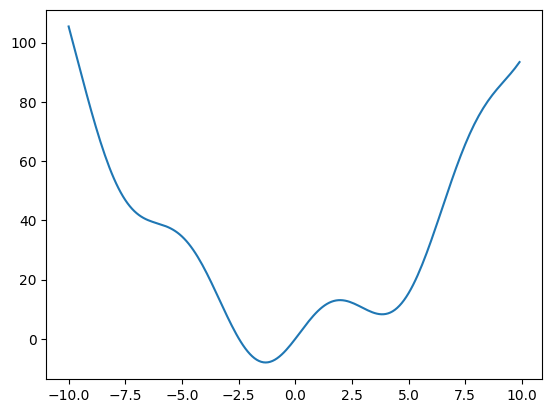

In [95]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

This function has a global minimum around -1.3 and a local minimum around 3.8.
- guessing the starting point is important, because there are different function incase of many minima

Searching for minimum can be done with scipy.optimize.minimize(), given a starting point x0, it returns the location of the minimum that it has found:

In [102]:
#this one is super simple, there is only one variables, and its the function f
result_temp = optimize.minimize(f, x0=0)
result_temp 

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -7.945823375615215
        x: [-1.306e+00]
      nit: 5
      jac: [-1.192e-06]
 hess_inv: [[ 8.589e-02]]
     nfev: 12
     njev: 6

## How to adjust for many miminums

In [115]:
#result = optimize.minimize(f, x0=3)
#result.x is 3.8 which is a local minima
#result changes because of starting point

#to fix this, and assuming we can not guess the starting point
#always start at 0
result =optimize.basinhopping(f, 0)  

In [116]:
result.x # The coordinate of the minimum  


array([3.8374671])

In [108]:
#method is how we fine tune which model, here it is a smooth curvem, so this method fits best.
#search up for different method
optimize.minimize(f, x0=0, method="L-BFGS-B")  


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -7.94582337561514
        x: [-1.306e+00]
      nit: 5
      jac: [-1.688e-06]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

In [117]:
#for basinhoping() since its powerful and use universally, we have to use dictionary for this

minimizer_kwargs = {"method": "L-BFGS-B"}

optimize.basinhopping(f, x0=0, minimizer_kwargs=minimizer_kwargs)


                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -7.9458233756152845
                          x: [-1.306e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1026
                       njev: 513
 lowest_optimization_result:  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
                              success: True
                               status: 0
                                  fun: -7.9458233756152845
                                    x: [-1.306e+00]
                                  nit: 3
                                  jac: [ 2.665e-07]
                                 nfev: 10
                                 njev: 5
                             hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

Note scipy.optimize.minimize_scalar() is a function with dedicated methods to minimize functions of only one variable.

## Constraints

### Bound (each variable)

In [ ]:
#applying constraint on individual values using bounds
res = optimize.minimize(f, x0=1,
                        bounds=((0, 10), ))
res.x    
#in this case, the global minimum is less than 0 but our bound dont allow that so result will be 0

#As minimize() works in general with x multidimensionsal, the “bounds” argument is a list of bound on each dimension.
#Must pay attention to the position of the variables in the function to match the bounds


### Costraints (multiple variables)



In [ ]:
#applying constraints on many variabels using the constraints keyword

# Define your objective function
def objective_function(x):
    return x[0]**2 + x[1]**2

# Define constraints
constraints = [
    {'type': 'ineq', 'fun': lambda x: x[0] - 1},  # x[0] >= 1
    {'type': 'eq', 'fun': lambda x: x[1] - 2}     # x[1] == 2
]
#the constraints parameter in optimize.minimum takes a dictionary
#that dictionary specify type equal or ineq 
#remember to specify the number of variabels especially if you have more than 1 x, just good practice

#because we [] our variable, 
result = optimize.minimize(objective_function, 0, constraints=constraints)


## finding the roots of a scalar function. f(x)=0

In [ ]:
root = optimize.root(f, x0=1)  # our initial guess is 1
root    # The full result

Note scipy.optimize.root() also comes with a variety of algorithms, set via the “method” argument.

# Deseasonalized data 

In [ ]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)

from scipy import signal

x_detrended = signal.detrend(x)

plt.plot(t, x) 

plt.plot(t, x_detrended) 
